In [14]:
'CMP3751M-Machine Learning: AMB19705060'
'In this task, I am required to solve a polynomial regresione example.' 
'A sample dataset named Task1 - dataset - polynomial regression has been provided from an unknown polynomial function'
'Here I am importing the requried libraries to help analyse the....'
'....performance of the polynomail regression.'
import numpy as np 
'Numpy perform a wide variety of mathematical operations on arrays'
import pandas as pd
'Pandas used for data manipulation and analysis, in this scenario will be used to read the data from csv file'
import matplotlib.pyplot as plt 
'Matplotlib helps to plot the polynomial fit, once new x and y values are calculated.'
import math
'pd.read_csv imports train,test data and labels from CSV file into new dataframe format' 
ml_task = pd.read_csv('Task1 - dataset - pol_regression.csv') 

'Here, training data is extracted to numpy arrays to collect values'
'for x'
ml_x = ml_task['x'].values 
'for y'
ml_y = ml_task['y'].values

In [15]:
'GetPolynomialDataMatrix is utilized to execute polynomail data matrix through given arguments as training input and output values ' 
def getPolynomialDataMatrix(x, degree):
#X is the feature expansion that is to be carried given its k-degree'
    X = np.ones(x.shape)
#Np.ones - returns new array of shape X'
    for i in range(1,degree + 1):
#For polynomial of n-th degree, we have n + 1 parameters, also known as polynomial_coefficients '         
        X = np.column_stack((X, x ** i))
#np.column_stack takes a sequence of 1-D arrays to stack them as columns for making a single 2-D array'
#Here it stacks each x value from x train'
#Then it multiplies itself (X) to the power of i'
    return X
'We can also interpret this function as being transparent to np.vander.' 
'However the beneficial of this function is that it processes faster. '
'The difference between function np.vander, it returns an array where the first column is x^(N-1), the second x^(N-2)'
   

'The difference between function np.vander, it returns an array where the first column is x^(N-1), the second x^(N-2)'

In [16]:
'Implementing getWeightsForPolynomialFit function to compute the optimal values for given x and y for a perfect polynomial fit.'
'In order to accompolish this, we want to test different polynomial to observe the data that best fits'
def getWeightsForPolynomialFit(x,y,degree):
#Here least squares method is utilized to acquire polynomials weight.'   
    X = getPolynomialDataMatrix(x, degree)
#X.Tranpose changes the data's row elements into column elements'
    XX = X.transpose().dot(X)
#np.linalg.solve calculates weight of the matrix equation with given matrices' 
    z = np.linalg.solve(XX, X.transpose().dot(y))
    return z

In [17]:
'Section 1.1: Implementation of Polynoimal Regression'

'The pol_regression function takes as arguments the training input and output values as input (both should be given as 1D numpy array with number of data-points elements). '
'Recall x and y values from dataset'
ml_x = ml_task['x'] 
ml_y = ml_task['y']

'Import linalg'
import numpy.linalg as linalg

def pol_regression(features_train,y_train,degree):
#Call function that obtains weights through least sqare method given its x,y,degree input.
    if degree != 0:
#Polynomial when not regressed at degree 0
        matrix = getPolynomialDataMatrix(features_train, degree)
#Feature expansion to produce matrix by 
        matrix_transposed =  matrix.transpose().dot(matrix)
#transpose the matrix
        parameters = linalg.solve(matrix_transposed,matrix.transpose().dot(y_train))
#Parameter that calculates weights using linalg.solve based on given matrices,then return its x coefficients. 
        return parameters            
    else:          
        return [np.mean(y_train)]   

In [18]:
'Section 1.2: Regress polynomial at defrees: 0,1,2,3,6,10'
#Specify data points for polynomial in the range of [-5, 5] for the inputs x
xp = np.linspace(-5,5)
#Plotting the graph
def regress_polynomial (z,degree): 
    plt.plot(ml_x,ml_y, 'mo')
#Setting the axis
    axis = plt.gca()
    axis.set_ylim([-175,25])

#If degree is not equal to 0, then plot polynomial according to its chosen degree
    if degree !=0:
#This plt.plot applies to all excluding to the degree of 0
            plt.plot(xp, getPolynomialDataMatrix(xp,degree).dot(z), 'y')
    else:
            plt.plot(xp, getPolynomialDataMatrix(xp, degree) * z, 'purple') #When regressed at degreee 0
    print(degree,i)
    plt.legend(('Ground Truth', 'Training Data', '$x^{'+str(degree)+'}$'), loc = 'center right')
    plt.show()

0 0


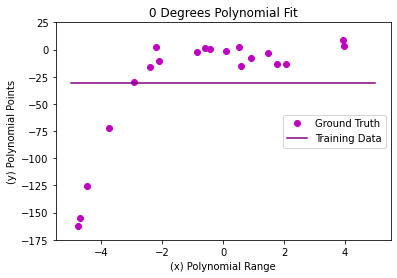

1 1


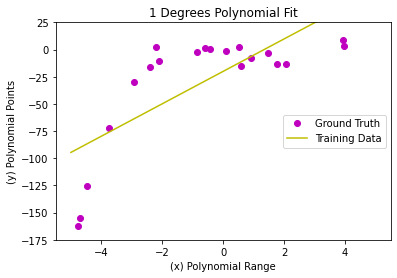

2 2


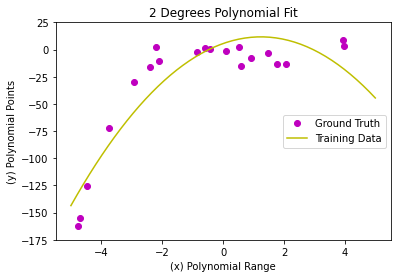

3 3


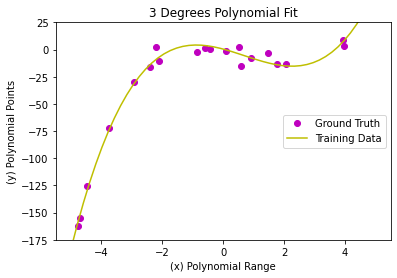

6 6


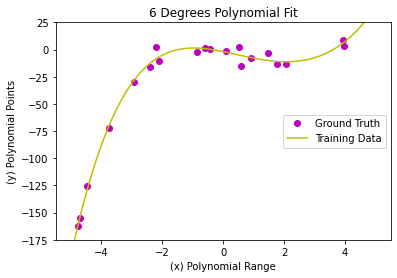

10 10


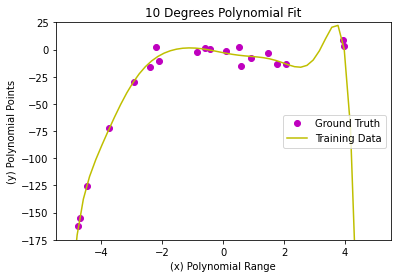

'Following the 10 degrees polynomial plot, we are begining to interpret a degreading polynomial This may be due to too many data dimension and minimal data '

In [19]:
'Regress data at degrees at 0,1,2,3,6,10'
plot_degree = np.array([0,1,2,3,6,10])
for i in plot_degree:
    z =  pol_regression(ml_x, ml_y, i)
#Plot Title + Axis Label
    plt.title((str(i) + ' Degrees Polynomial Fit'))
    plt.xlabel('(x) Polynomial Range')
    plt.ylabel('(y) Polynomial Points') 
    regress_polynomial (z, i) 
'Following the 10 degrees polynomial plot, we are begining to interpret a degreading polynomial This may be due to too many data dimension and minimal data '    

In [20]:
'Section 1.3: Evaluation'
'This function takes arguments such as the parameters computed from the pol_regression function and evaluates its algorithm’s performance on the input x and output y' 
def eval_pol_regression(parameters, x, y, degree):
#When degree is equivalent to 0, multiply degree with its parameters, else also multiply. 
#Otherwise multiplication wont be taking place'    
    if degree == 0:
        pr_matrix = getPolynomialDataMatrix(x, degree)*(parameters)
    else:
        pr_matrix = getPolynomialDataMatrix(x, degree).dot(parameters)
#Here we are calculating RMSE. Root square mean.
#Where np.srt is used to return the square root of pr_matrix as argument
    rmse = np.sqrt(np.mean(np.square(np.subtract(pr_matrix,y))))
    return rmse

In [21]:
x_train = ml_x[0:15]
y_train = ml_y[0:15]
x_test = ml_x[15:20]
y_test = ml_y[15:20] 

#Assign values for regression to be performed
pr0 = pol_regression(x_train,y_train,0)
pr1 = pol_regression(x_train,y_train,1)
pr2 = pol_regression(x_train,y_train,2)
pr3 = pol_regression(x_train,y_train,3)
pr5 = pol_regression(x_train,y_train,5)
pr10 = pol_regression(x_train,y_train,10)


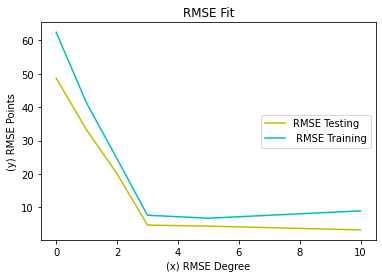

<Figure size 432x288 with 0 Axes>

In [22]:
#Assign values for test data 
eval_test1 = eval_pol_regression(pr1, x_test,y_test, 1)
eval_test2 = eval_pol_regression(pr2, x_test,y_test, 2)
eval_test3 = eval_pol_regression(pr3, x_test,y_test, 3)
eval_test5 = eval_pol_regression(pr5, x_test,y_test, 5)
eval_test10 = eval_pol_regression(pr10, x_test,y_test, 10)
eval_test0 = eval_pol_regression(pr0, x_test,y_test, 0)
#Assign values for train data 
eval_train1 = eval_pol_regression(pr1, x_train,y_train, 1)
eval_train2 = eval_pol_regression(pr2, x_train,y_train, 2)
eval_train3 = eval_pol_regression(pr3, x_train,y_train, 3)
eval_train5 = eval_pol_regression(pr5, x_train,y_train, 5)
eval_train10 = eval_pol_regression(pr10, x_train,y_train, 10)
eval_train0 = eval_pol_regression(pr0, x_train,y_train, 0) 

#Evaluating the perfomance of the algorithm by plotting the RMSE
#Plotting the RMSE to the same degree of 0,1,2,3,6,10
plt.plot([0,1,2,3,5,10],[eval_train0,eval_train1,eval_train2,eval_train3,eval_train5,eval_train10], 'y') 
#Plots train points evaluation
plt.plot([0,1,2,3,5,10],[eval_test0,eval_test1,eval_test2,eval_test3,eval_test5,eval_test10], 'c') 
#Plots test points evaluation
plt.legend(('RMSE Testing',' RMSE Training'), loc = 'center right') #Graph Legend
plt.title(('RMSE Fit'))
plt.xlabel('(x) RMSE Degree')
plt.ylabel('(y) RMSE Points')
plt.figure() #Create figure/graph

#Shuffle data
ml_taskdf = ml_task.sample(frac=1)
# Train: 70%, Test: 30%
training_ds = ml_taskdf[0:(int(round(len(ml_taskdf)*0.7))):(len(ml_taskdf))]
testing_ds = ml_taskdf[(int(round(len(ml_taskdf)*0.3))):(len(ml_taskdf))]

In [23]:
'Which degree would you now choose? '
'Are there any degrees of the polynomials where you can clearly identify over and underfitting?'
'Explain your findings in great detail.'


'We can see that, while the training error decreases with a larger degree of the polynomial, the test set error significantly increases (which is the one we are interested in). This is a typical behavior we get for overfitting. We can make the following conclusions:'
'In order to fit the data well, we have to find the right model complexity'
'Over-fitting: The model-complexity is too high (degree > 4). We fit the noise and not the data'
'Under-fitting: The model-complexity is too low (degree < 3). We can not represent the data well enough.'
'For choosing the optimal model, we always have to consider the error on an independent test set not on the training set'
'On the training set, the error can be arbitrarily good. This is only an indication that the algorithm has learned the example by heart, not that it can generalize to new samples.'

'On the training set, the error can be arbitrarily good. This is only an indication that the algorithm has learned the example by heart, not that it can generalize to new samples.'